In [65]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import alphashape
from descartes import PolygonPatch
import numpy as np

path="/home/alguero/Work/smodelsv2-paper/IDM-Scoto/scalar_DM_scenario"
df = pd.read_csv("scalarData.csv")
fer = pd.read_csv("scalarDataFermions.csv")
df['topo'] = df['topo'].apply(lambda x: x.replace("'", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("[", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("]", ""))
df=df.sort_values(by='rmax', ascending=True)
df

,mA0,mHc,mH0,deltaM,dHc,rmax,rmax2,rmaxHSCP,rmaxDT,ana,topo,ana2,topo2,bestTx,pions
9178,499.4427,386.3139,385.8176,0.4963,0.004635,0.000015,3.617189e-07,3.617189e-07,0.000015,ATLAS-SUSY-2016-06,"TDTM1S, TDTM2S",ATLAS-SUSY-2016-32,"['THSCPM1b', 'THSCPM2b', 'THSCPM3', 'THSCPM4']",TDTM1S,True
10273,456.0158,390.7605,390.2674,0.4931,0.004730,0.000017,4.114657e-07,4.114657e-07,0.000017,ATLAS-SUSY-2016-06,"TDTM1S, TDTM2S",ATLAS-SUSY-2016-32,"['THSCPM1b', 'THSCPM2b', 'THSCPM9']",TDTM1S,True
2460,402.8527,377.3270,376.8308,0.4962,0.004637,0.000018,3.450495e-07,3.450495e-07,0.000018,ATLAS-SUSY-2016-06,"TDTM1S, TDTM2S",ATLAS-SUSY-2016-32,"['THSCPM1b', 'THSCPM2b', 'THSCPM9']",TDTM1S,True
19950,443.2197,374.8294,374.3386,0.4908,0.004797,0.000025,2.979929e-07,2.979929e-07,0.000025,ATLAS-SUSY-2016-06,"TDTM1S, TDTM2S",ATLAS-SUSY-2016-32,"['THSCPM1b', 'THSCPM2b', 'THSCPM9']",TDTM1S,True
9845,390.6307,363.9185,363.4252,0.4933,0.004724,0.000027,2.032018e-07,2.032018e-07,0.000027,ATLAS-SUSY-2016-06,"TDTM1S, TDTM2S",ATLAS-SUSY-2016-32,"['THSCPM1b', 'THSCPM2b', 'THSCPM9']",TDTM1S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9924,114.5173,102.3744,102.3066,0.0678,942.927382,54.134200,2.082111e+01,5.413420e+01,0.000000,CMS-EXO-13-006,"THSCPM1b, THSCPM2b, THSCPM9",CMS-EXO-12-026,['THSCPM1b'],THSCPM2b,False
8463,109.3860,103.4855,103.4249,0.0606,1662.883382,55.125540,2.035306e+01,5.512554e+01,0.000000,CMS-EXO-13-006,"THSCPM1b, THSCPM2b, THSCPM9",CMS-EXO-12-026,['THSCPM1b'],THSCPM2b,False
8853,108.2107,102.4117,102.3617,0.0500,4337.082957,56.583420,2.103681e+01,5.658342e+01,0.000000,CMS-EXO-13-006,"THSCPM1b, THSCPM2b, THSCPM9",CMS-EXO-12-026,['THSCPM1b'],THSCPM2b,False
7023,107.9782,100.5820,100.5166,0.0654,1136.537662,57.481690,2.189941e+01,5.748169e+01,0.000000,CMS-EXO-13-006,"THSCPM1b, THSCPM2b, THSCPM9",CMS-EXO-12-026,['THSCPM1b'],THSCPM2b,False


In [66]:
excl = df[df['rmax'] > 1]
ald = df[~(df['rmax'] > 1)]
near = df[(0.5 < df['rmax']) & (df['rmax'] < 1.)]
dt = df[df['rmaxDT']>1]
atlas = dt[dt.ana.str.contains('ATLAS')]
dtf = fer[fer['rmaxDT']>1]
cms = dtf[dtf.ana.str.contains('CMS')]
atlasf = fer[((fer.ana.str.contains('ATLAS-SUSY-2016-06')) & (fer['rmax'] > 1)) | ((fer.ana2.str.contains('ATLAS-SUSY-2016-06')) & (fer['rmax2'] > 1))]
hscp = df[df['rmaxHSCP']>1]
analyses = excl.ana.unique()
topos = excl.bestTx.unique()
analyses

array(['CMS-EXO-13-006', 'ATLAS-SUSY-2016-06', 'ATLAS-SUSY-2016-32'],
      dtype=object)

In [67]:
tot = df.shape[0]
for ana in analyses:
    part = df[df['ana'] == ana].shape[0]
    percent = part/tot
    print(ana, percent*100)

CMS-EXO-13-006 41.33119200571021
ATLAS-SUSY-2016-06 34.03283369022127
ATLAS-SUSY-2016-32 24.635974304068522


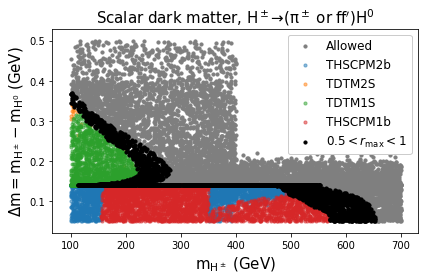

In [68]:
plt.figure(figsize=(6,4))
plt.scatter(ald['mHc'], ald['deltaM'], color='tab:grey', label="Allowed", s=10)
# plt.scatter(excl['deltaM'], excl['mHc'])
for topo in topos:
    toplot = excl[excl['bestTx']==topo]
    label = topo
    plt.scatter(toplot['mHc'], toplot['deltaM'], label=label, s=10, alpha=0.5)
plt.scatter(near['mHc'], near['deltaM'], color='black', label=r"$0.5<r_{\rm{max}}<1$", s=10)


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

# plt.ylim(0,700)
# plt.xlim(0,800)
plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{\Delta m = m_{H^\pm} - m_{H^0}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
plt.show()

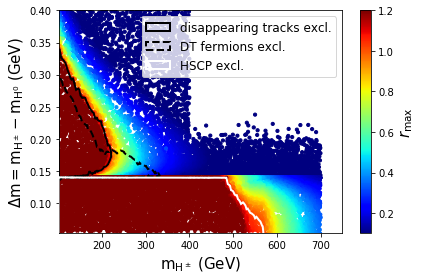

In [69]:
plt.figure(figsize=(6,4))
ax = plt.gca()
plt.scatter(df['mHc'],df['deltaM'],c=df['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=10)
cb = plt.colorbar()
cb.set_label(label=r'$r_{\rm{max}}$', fontsize=15)

####Disappearing tracks
frame_analysis2d=dt[['mHc','deltaM']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',fill=False,zorder=20,lw=2,label='disappearing tracks excl.'))

####Disappearing tracks with fermions
frame_analysis2d=dtf[['mHc','deltaM']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',ls='--',fill=False,zorder=20,lw=2,label='DT fermions excl.'))

        
####HSCP
frame_analysis2d=hscp[['mHc','deltaM']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='white',fill=False,zorder=20,lw=2,label='HSCP excl.'))

lgd = plt.legend(loc='upper right',fontsize=12)

plt.ylim(0.053,0.4)
plt.xlim(101,750)
# plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{\Delta m = m_{H^\pm} - m_{H^0}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "scalarDeltaM.png")
plt.savefig(file)
plt.show()

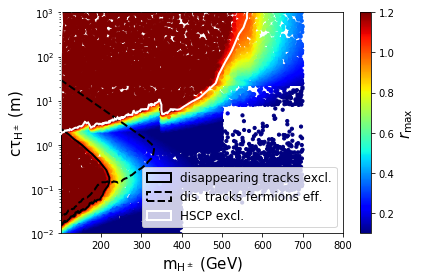

In [70]:
plt.figure(figsize=(6,4))
ax = plt.gca()
plt.scatter(df['mHc'],df['dHc'],c=df['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=10)
cb = plt.colorbar()
cb.set_label(label=r'$r_{\rm{max}}$', fontsize=15)

####Disappearing tracks
frame_analysis2d=dt[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',fill=False,zorder=20,lw=2,label='disappearing tracks excl.'))

####Disappearing tracks with fermions
frame_analysis2d=dtf[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',ls='--',fill=False,zorder=20,lw=2,label='dis. tracks fermions eff.'))
        
####HSCP
frame_analysis2d=hscp[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
# Function for varying the alpha parameter
def alf(ind, r):
    if any(frame_analysis2d[ind][:,0] < 200) and any(frame_analysis2d[ind][:,1] < 7):
        return .05
#     elif any(frame_analysis2d[ind][:,0] < 280) and any(frame_analysis2d[ind][:,1] < 10):
#         return .0002
    elif any(frame_analysis2d[ind][:,0] < 380) and any(frame_analysis2d[ind][:,1] < 10):
        return .3
    else:
        return .0002                
                
alpha_shape = alphashape.alphashape(frame_analysis2d, alf)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='white',fill=False,zorder=20,lw=2,label='HSCP excl.'))

lgd = plt.legend(loc='lower right', fontsize=12)

plt.ylim(1e-2,1e3)
plt.xlim(101,800)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 25)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (m)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "scalarWidth.png")
plt.savefig(file)
plt.show()

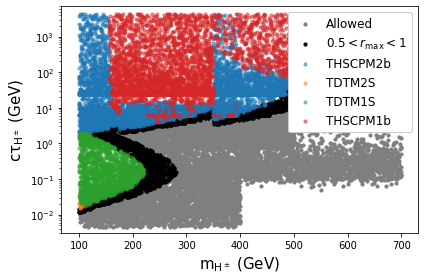

In [71]:
plt.figure(figsize=(6,4))
plt.scatter(ald['mHc'], ald['dHc'], color='tab:grey', label="Allowed", s=10)
plt.scatter(near['mHc'], near['dHc'], color='black', label=r"$0.5<r_{\rm{max}}<1$", s=10)
for topo in topos:
    toplot = excl[excl['bestTx']==topo]
    label = topo
    plt.scatter(toplot['mHc'], toplot['dHc'], label=label, alpha=0.5, s=10)


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
plt.show()

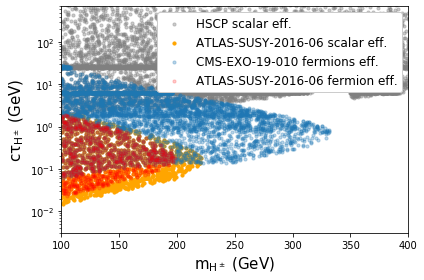

In [77]:
plt.figure(figsize=(6,4))
plt.scatter(hscp['mHc'], hscp['dHc'], label=r"HSCP scalar eff.", s=10, color='grey', alpha=0.4)
plt.scatter(atlas['mHc'], atlas['dHc'], label=r"ATLAS-SUSY-2016-06 scalar eff.", s=10, color='orange')
plt.scatter(cms['mHc'], cms['dHc'], label=r"CMS-EXO-19-010 fermions eff.", s=10, alpha = 0.3, color='C0')
plt.scatter(atlasf['mHc'], atlasf['dHc'], label=r"ATLAS-SUSY-2016-06 fermion eff.", s=10, color='red', alpha=0.2)


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E2)
plt.xlim(100,400)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "DTcomparison.png")
plt.savefig(file)
plt.show()

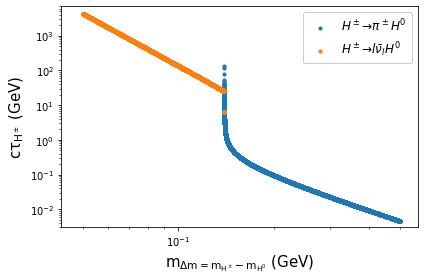

In [73]:
plt.figure(figsize=(6,4))
pions = df[df['pions']]
nopions = df[~df['pions']]
plt.scatter(pions['deltaM'], pions['dHc'], label=r"$H^\pm \to \pi^\pm H^0$", s=10)
plt.scatter(nopions['deltaM'], nopions['dHc'], label=r"$H^\pm \to l\bar{\nu}_l H^0$", s=10)



lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
plt.xscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{\Delta m = m_{H^\pm} - m_{H^0}}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "hpWidth.png")
plt.savefig(file)
plt.show()